In [43]:
# NOTA BENE
# i didnt submitted the csv file because it was too big

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df.head(15)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [5]:
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [6]:
# Generate a frequency table for the product category:
frequency_table_category = df['category'].value_counts()
frequency_table_category

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [7]:
# Which are the top 5 most listed product categories?
top5cat = frequency_table_category.head(5)
top5cat

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [8]:
top5cat.values

array([836265,  19312,  19229,  19092,  18978], dtype=int64)

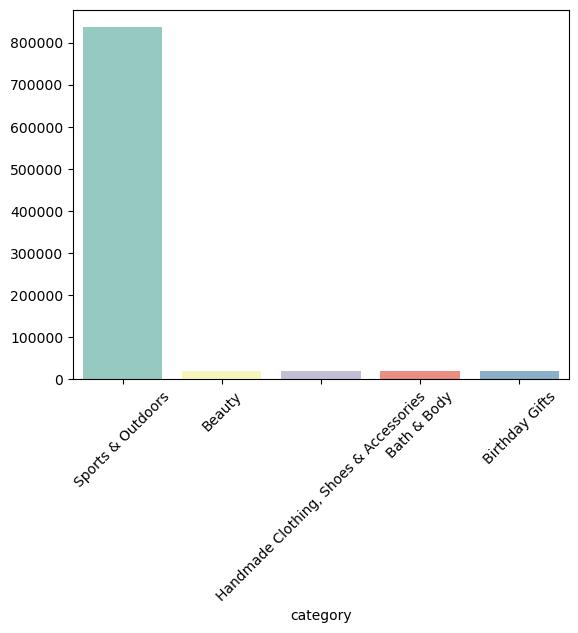

In [9]:
#2 Visualizations:
# Display the distribution of products across different categories using a bar chart.
# If you face problems understanding the chart, do it for a subset of top categories.
sns.barplot(x=top5cat.index, y=top5cat.values, palette="Set3")
plt.xticks(rotation=45) #rotation of text labels for X axis
plt.show()

<Axes: ylabel='count'>

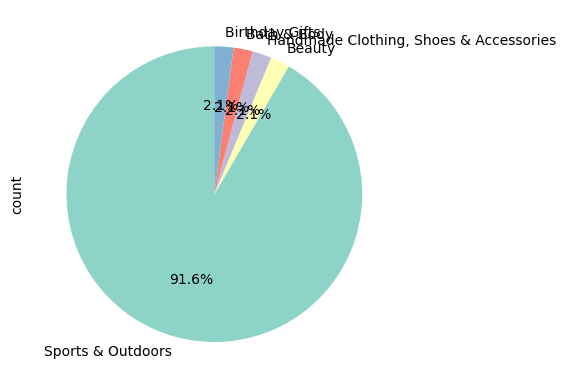

In [10]:
# For a subset of top categories, visualize their proportions using a pie chart. 
# Does any category dominate the listings?
top5cat.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
# Sports & Outdoors is the dominating category.

In [11]:
# Part 2: Delving into Product Pricing
# Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?
# Measures of Centrality:
# Calculate the mean, median, and mode for the price of products.

mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price



(89.24380943923663, 19.09, 9.99)

In [ ]:
# The average price 89.24380943923663 is about 9 times greater than the mode 9.99

In [15]:
# Measures of Dispersion:
# Determine the variance, standard deviation, range, and interquartile range for product price.
var = df['price'].var()
std = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])
var,std,min_price,max_price,range_price,quantiles_price

(119445.48532256528,
 345.60886175352226,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [ ]:
# How varied are the product prices? Are there any indicators of a significant spread in prices?
# The variance is very high : 119445.48532256528 
# The variance, a measure of how far each sale price in the set is from the mean (89.24380943923663)
#  A high variance implies that sale prices can be quite different from one another.

<Axes: xlabel='price', ylabel='Count'>

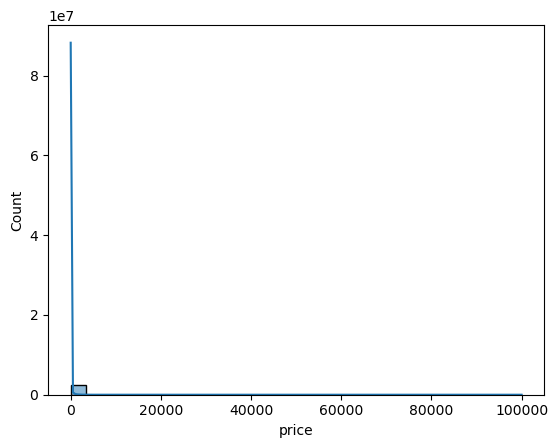

In [17]:
#3 Visualizations:
# Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
# If its hard to read these diagrams, think why this is, and explain how it could be solved..
sns.histplot(df['price'], kde=True, bins=30)
# We need to reduce the graphic scale of Count.

<Axes: >

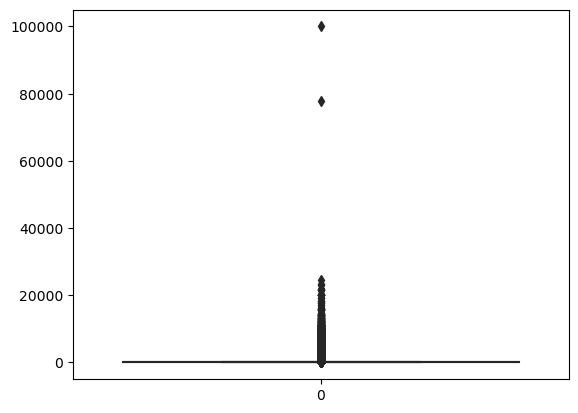

In [21]:
# Are there products that are priced significantly higher than the rest? 
# Use a box plot to showcase the spread and potential outliers in product pricing.
sns.boxplot(data = df['price'], color="green")

In [33]:
# Part 3: Unpacking Product Ratings
# Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?
# Calculate the mean, median, and mode for the rating of products.
# How do customers generally rate products? Is there a common trend?
mean = df['stars'].mean()
median = df['stars'].median()
mode = df['stars'].mode()[0]
mean,median,mode

(2.152836472966065, 0.0, 0.0)

In [35]:
#3 Shape of the Distribution:
# Calculate the skewness and kurtosis for the rating column.
# Are the ratings normally distributed, or do they lean towards higher or lower values?
df['stars'].skew()

0.08120735761080985

In [37]:
df['stars'].kurtosis()

-1.9260061280432985

In [ ]:
# skewness is near 0 , so it is almost a normal distribution , but distributed a little bit on the left
# kurtosis is <0 , so there is not a lot of diverging values.

<Axes: xlabel='stars', ylabel='Count'>

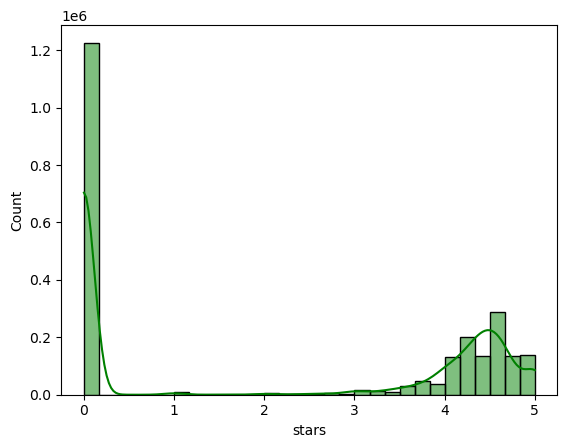

In [41]:
#4 Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
sns.histplot(df['stars'], kde=True, bins=30, color='green')

In [ ]:
# If we avoid the zero rating, we can say that people rate almost between 4 and 5 in average.